In [4]:
import numpy as np
import sklearn

# A. K-means algorithm
The idea behind clustering data is pretty simple: partition a dataset into groups of similar data observations. How we go about finding these clusters is a bit more complex, since there are a number of different methods for clustering datasets.

The most well-known clustering method is K-means clustering. The K-means clustering algorithm will separate the data into K clusters (the number of clusters is chosen by the user) using cluster means, also known as centroids.

These centroids represent the "centers" of each cluster. Specifically, a cluster's centroid is equal to the average of all the data observations within the cluster.

In [3]:
cluster = np.array([
  [ 1.2, 0.6],
  [ 2.4, 0.8],
  [-1.6, 1.4],
  [ 0. , 1.2]])
print('Cluster:\n{}\n'.format(repr(cluster)))

centroid = cluster.mean(axis=0)
print('Centroid:\n{}\n'.format(repr(centroid)))

Cluster:
array([[ 1.2,  0.6],
       [ 2.4,  0.8],
       [-1.6,  1.4],
       [ 0. ,  1.2]])

Centroid:
array([0.5, 1. ])



The K-means clustering algorithm is an iterative process. Each iteration, the algorithm will assign each data observation to the cluster with the closest centroid to the observation (using the regular distance metric).

Then it updates each centroid to be equal to the new average of the data observations in the cluster. Note that at the beginning of the algorithm, the cluster centroids are either randomly initialized or (better) initialized using the K-means++ algorithm. The clustering process stops when there are no more changes in cluster assignment for any data observation.

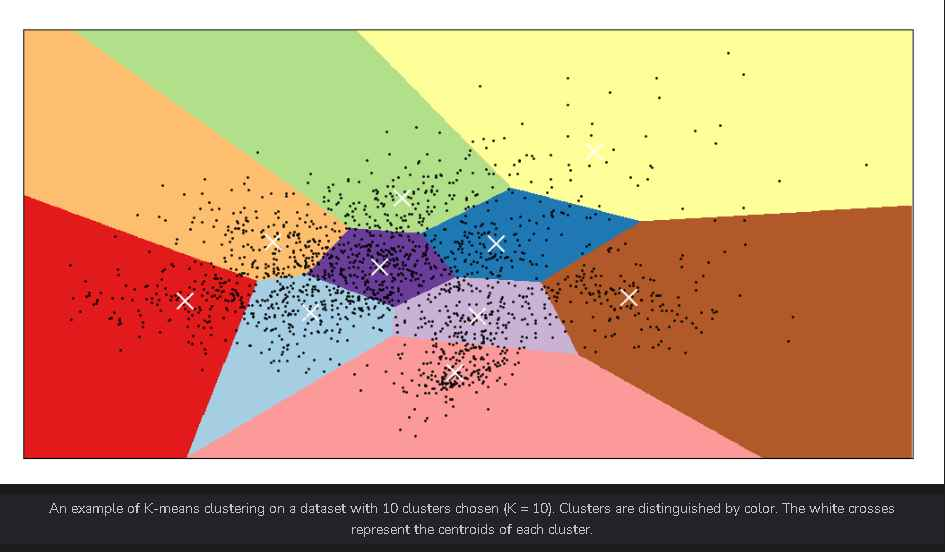

In scikit-learn, K-means clustering is implemented using the KMeans object (part of the cluster module).

The code below demonstrates how to use the KMeans object (with 3 clusters).

In [5]:
data = np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# predefined data
print(repr(data.shape))
kmeans.fit(data)

# cluster assignments
print('{}\n'.format(repr(kmeans.labels_)))# this basically divided the data into many group and labeled them as 0,1,2 and so on according to the number of groups
print(repr(kmeans.labels_.shape))
# centroids
print('{}\n'.format(repr(kmeans.cluster_centers_)))# it gives the centroids of each group column wise (means if the data is divided into 3 groups and there are 4 columns in the data then there are 12 centroids represented by a 2d array of size 3,4)
# we have take total clusters = 3 so it divides our kmeans(data) into 3 equal parts row wise means of size 50 for each
# and take the mean of those 50 values and print 
# you can relate the first row print by previous program --> print('{}\n'.format(repr(kmeans.cluster_centers_)))
# with the last program --> print(repr(data[0:50].mean(axis = 0))) where i have taken a mean of first 50 values of each column

new_obs = np.array([
  [5.1, 3.2, 1.7, 1.9],
  [6.9, 3.2, 5.3, 2.2]])
# predict clusters
print('{}\n'.format(repr(kmeans.predict(new_obs))))# it predicts according to the training data(given above) that which row of new_obs will suit which group or cluster
print(repr(data[0:50].mean(axis = 0)))

(150, 4)
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

(150,)
array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

array([0, 1])

array([5.006, 3.428, 1.462, 0.246])


The KMeans object uses K-means++ centroid initialization by default. The n_clusters keyword argument lets us set the number of clusters we want. In the example above, we applied clustering to data using 3 clusters.

The labels_ attribute of the object tells us the final cluster assignments for each data observation, and the cluster_centers_ attribute represents the final centroids. We use the predict function to assign new data observations to one of the clusters.

# B. Mini-batch clustering
When working with very large datasets, regular K-means clustering can be quite slow. To reduce the computation time, we can perform mini-batch K-means clustering, which is just regular K-means clustering applied to randomly sampled subsets of the data (mini-batches) at a time.

There is a trade-off in using mini-batch clustering, as the results may not be as good as regular K-means clustering. However, in practice the difference in quality is negligible, so mini-batch clustering is usually the choice when dealing with large datasets.

In scikit-learn, mini-batch K-means clustering is implemented using the MiniBatchKMeans object (also part of the cluster module). It is used in the same way as the regular KMeans object, with an additional batch_size keyword argument during initialization that allows us to specify the size of each mini-batch.

In [18]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=10)
# predefined data
print(repr(data.shape))
kmeans.fit(data)

# cluster assignments
print('{}\n'.format(repr(kmeans.labels_)))

# centroids
print('{}\n'.format(repr(kmeans.cluster_centers_)))

new_obs = np.array([
  [5.1, 3.2, 1.7, 1.9],
  [6.9, 3.2, 5.3, 2.2]])
# predict clusters
print('{}\n'.format(repr(kmeans.predict(new_obs))))

(150, 4)
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[6.60892857, 2.98988095, 5.39166667, 1.89047619],
       [5.04850746, 3.46716418, 1.4761194 , 0.25895522],
       [5.82      , 2.728     , 4.234     , 1.33      ]])

array([1, 0])



Note that the clusterings can have different permutations, i.e. different cluster labelings (0, 1, 2 vs. 1, 2, 0). Otherwise, the cluster assignments for both KMeans and MiniBatchKMeans should be relatively the same.

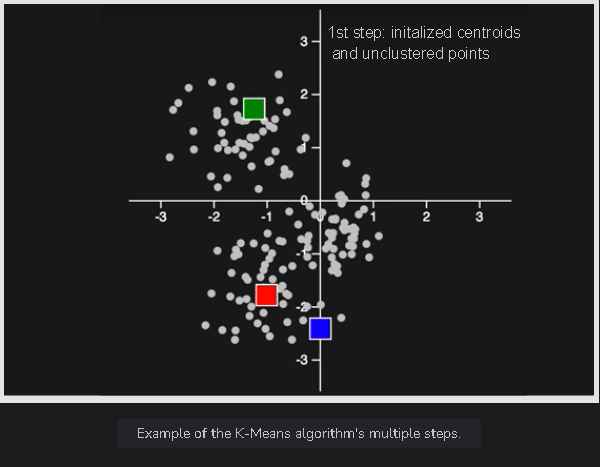

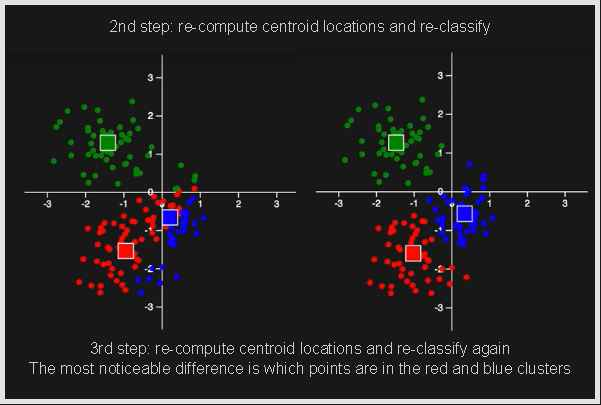